# Text Classification


In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [12]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**Check to see if there are any missing values in the dataframe.**

In [14]:
# Check for NaN values:
df.isnull().sum()

label      0
review    35
dtype: int64

 **Remove any reviews that are NaN**

In [15]:
df = df.dropna()

In [16]:
df['review'].str.isspace().sum()

27

In [17]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [18]:
df = df[~df['review'].str.isspace()]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [20]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

## EDA on Bag of Words

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer(stop_words='english')

In [27]:
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [28]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

In [29]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

In [30]:
#CODE HERE

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [50]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('DecisionTreeClassifir', DecisionTreeClassifier()),])

In [51]:
# Feed the training data through the pipeline
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('DecisionTreeClassifir', DecisionTreeClassifier())])

**Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [52]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [53]:
preds = pipe.predict(X_test)

In [54]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.65      0.64      0.64       191
         pos       0.65      0.66      0.66       197

    accuracy                           0.65       388
   macro avg       0.65      0.65      0.65       388
weighted avg       0.65      0.65      0.65       388



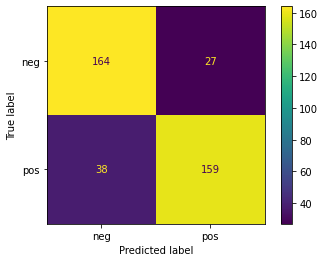

In [38]:
plot_confusion_matrix(pipe,X_test,y_test)

In [40]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('LogisticRegression', LogisticRegression()),])

In [41]:
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression())])

In [42]:
preds = pipe.predict(X_test)

In [43]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.80      0.85      0.82       191
         pos       0.84      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



In [46]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('MultinomialNB', MultinomialNB()),])

In [47]:
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])

In [48]:
preds = pipe.predict(X_test)

In [49]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



## Great job!